# Hw-4

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 

DATA_NAME = 'binary_random_20fa.hdf5'

In [4]:
with h5py.File(DATA_NAME, 'r') as hf:
    print(list(hf.keys()))
    human=hf['human'][:]
    machine=hf['machine'][:]
    print(human.shape)
    print(machine.shape)
    print(human[0])
    print(machine[0])

['human', 'machine']
(5100, 20)
(5100, 20)
[ 1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.
  1.  1.]
[ 1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1]


In [5]:
X = np.vstack(( human, machine))
R_total = (X.T @ X)/10200
R_human =  (human.T @ human)/5100
R_machine = (machine.T @ machine)/5100

print(R_total)
print(R_human)
print(R_machine)

[[ 1.00000000e+00  7.84313725e-04  4.86274510e-02 -2.45098039e-02
   9.80392157e-03  3.72549020e-03  1.96078431e-02 -3.92156863e-03
   3.74509804e-02  2.50980392e-02  2.54901961e-03 -2.00000000e-02
   1.50980392e-02  1.07843137e-02  3.29411765e-02 -1.25490196e-02
   2.94117647e-03 -7.64705882e-03  1.62745098e-02  3.92156863e-03]
 [ 7.84313725e-04  1.00000000e+00  3.09803922e-02 -5.29411765e-03
   1.17647059e-02  3.35294118e-02  4.31372549e-03  2.19607843e-02
  -3.62745098e-02  2.07843137e-02 -1.39215686e-02  3.05882353e-02
   1.70588235e-02  1.82352941e-02 -8.62745098e-03  1.09803922e-02
   1.15686275e-02  2.64705882e-02 -1.76470588e-03 -4.31372549e-03]
 [ 4.86274510e-02  3.09803922e-02  1.00000000e+00 -4.45098039e-02
   6.94117647e-02 -1.76470588e-03  4.19607843e-02  1.52941176e-02
   3.47058824e-02 -1.80392157e-02  1.90196078e-02  2.74509804e-03
   3.35294118e-02  5.88235294e-04  3.52941176e-02 -7.84313725e-03
   2.72549020e-02  5.88235294e-04  7.64705882e-03  1.17647059e-02]
 [-2.45

# 4-2

The variance of the most significant two components of total data is [1.40624077 1.24275847]
The percentage of the total variance do these two components capture: 0.1324499621264555


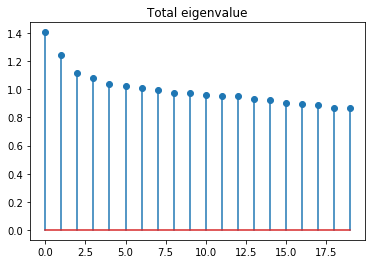

In [6]:
eig_val, eig_vec = np.linalg.eig(R_total)
X_idx = eig_val.argsort()[::-1]
eig_val = eig_val[X_idx]
eig_vec = eig_vec[:, X_idx]
eig_val_first_percentage = np.sum(eig_val[0:2]) / np.sum(eig_val)
plt.figure()
plt.stem(eig_val)
plt.title('Total eigenvalue')
print('The variance of the most significant two components of total data is', eig_val[0:2])
print('The percentage of the total variance do these two components capture:', eig_val_first_percentage)

The variance of the most significant two components of human data is [1.82493802 1.48299152]
The percentage of the total variance do these two components capture: 0.16539647673511804


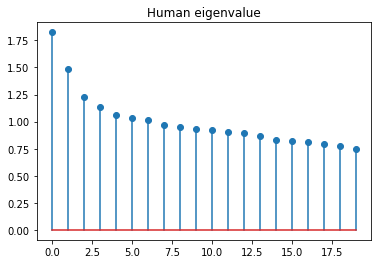

In [7]:
human_val, human_vec = np.linalg.eig(R_human)
human_idx = human_val.argsort()[::-1]
human_val = human_val[human_idx]
human_vec = human_vec[:, human_idx]
human_val_first_percentage = np.sum(human_val[0:2]) / np.sum(human_val)
plt.figure()
plt.stem(human_val)
plt.title('Human eigenvalue')
print('The variance of the most significant two components of human data is', human_val[0:2])
print('The percentage of the total variance do these two components capture:', human_val_first_percentage)

The variance of the most significant two components of machine data is [1.12090004 1.08794006]
The percentage of the total variance do these two components capture: 0.11044200496984886


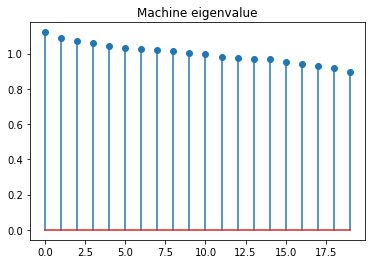

In [8]:
machine_val, machine_vec = np.linalg.eig(R_machine)
machine_idx = machine_val.argsort()[::-1]
machine_val = machine_val[machine_idx]
machine_vec = machine_vec[:, machine_idx]
machine_val_first_percentage = np.sum(machine_val[0:2]) / np.sum(machine_val)
plt.figure()
plt.stem(machine_val)
plt.title('Machine eigenvalue')
print('The variance of the most significant two components of machine data is', machine_val[0:2])
print('The percentage of the total variance do these two components capture:', machine_val_first_percentage)

The significance of the eigenvectors e0 and e1 is that it can represent 13% of the data and help us to do PCA.
The reason they can capture much of the variation is that they stand for some features in the matrix which can help us classify human and machine work.

# 4-3

In [9]:
def HardDecision(y_predict):
    y_predict_hard=np.zeros(np.shape(y_predict))
    for i in range(np.shape(y_predict)[0]):
        if(y_predict[i]>=0):
            y_predict_hard[i]=1
        else:
            y_predict_hard[i]=-1
    return y_predict_hard
    
def linearRegression(X, y):
    train_set = np.concatenate((X, y[:, None]), axis=1)
    np.random.shuffle(train_set)
    X = train_set[:, 0:20]
    y = train_set[:, -1]
    w = np.zeros(20)
    times = 100
    learning_rate = 0.15
    for i in range(times):
        w = w -  (learning_rate * X.T @ (X @ w - y))/10200
    y_predict_soft = X @ w
    y_predict_hard = HardDecision(y_predict_soft)
    error_rate = np.sum(y_predict_hard != y) / np.shape(y)[0]
    return w, y_predict_soft, y_predict_hard, error_rate

In [10]:
y = np.append( np.ones(np.shape(human)[0]), -1 *  np.ones(np.shape(machine)[0]))
w_linear, y_pred_linear_soft, y_pred_linear_hard, error_rate_linear = linearRegression(X, y)
print("Error rate by linear classifier is", error_rate_linear)
print(w_linear)

Error rate by linear classifier is 0.4688235294117647
[-0.0319093   0.01726425 -0.01364337 -0.0342578   0.01059267 -0.00102542
  0.01311004 -0.0147587  -0.03193807  0.01223411 -0.02233385 -0.00145941
  0.00291689 -0.01706871 -0.00667414 -0.02850382 -0.00124366 -0.01104852
 -0.00275187  0.00782254]


Try using sklearn model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X,y)
y_predict=regressor.predict(X)
y_predict_hard=HardDecision(y_predict)

print("Error rate by linearRegression of sklearn is",np.sum(y_predict_hard != y) / 10200)

Error rate by linearRegression of sklearn is 0.4684313725490196


In [12]:
print(y_pred_linear_soft)
print(y_predict)
print(y_pred_linear_hard)
print(y_predict_hard)

[ 0.0041665  -0.05049696 -0.12176911 ... -0.10185088 -0.03510992
  0.00601298]
[ 0.0912832   0.14590907 -0.02165305 ... -0.10132037  0.01285945
  0.01373902]
[ 1. -1. -1. ... -1. -1.  1.]
[ 1.  1. -1. ... -1.  1.  1.]


# 4-4

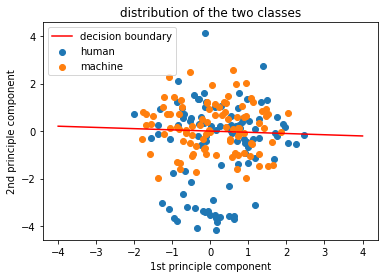

In [13]:
mask = eig_vec[:, 0:2]
humam_PCA = human @ mask
machine_PCA = machine @ mask
w_linear_PCA = w_linear @ mask

plt.figure()
plt.scatter(humam_PCA[:100,0], humam_PCA[:100,1], label='human')
plt.scatter(machine_PCA[:100,0], machine_PCA[:100,1], label='machine')


slot = (-1) / (w_linear_PCA[1] / w_linear_PCA[0])
t = np.linspace(-4,4,10200)
decision_boundary = slot * t
plt.plot(t, decision_boundary, color='red',label='decision boundary')
plt.legend()
plt.title('distribution of the two classes')
plt.xlabel('1st principle component')
plt.ylabel('2nd principle component')
plt.show()

# 4-5

In [14]:
def Sigmiod(x):
    return 1 / (1 + np.exp(-x))

def HardDecision2(y_predict):
    y_predict_hard=np.zeros(np.shape(y_predict))
    for i in range(np.shape(y_predict)[0]):
        if(y_predict[i]>0.5):
            y_predict_hard[i]=1
        else:
            y_predict_hard[i]=-1
    return y_predict_hard

def logisticalRegression(X, y):
    train_set = np.concatenate((X, y[:, None]), axis=1)
    np.random.shuffle(train_set)
    X = train_set[:, 0:20]
    y = train_set[:, -1]
    w = np.zeros(20)
    iter_time = 100
    eta = 0.15
    for i in range(iter_time):
        w = w - (eta * X.T @ (Sigmiod(X @ w) - y))/10200
    y_predict_soft = X @ w
    y_predict_hard = HardDecision2(y_predict_soft)
    error_rate = np.sum(y_predict_hard != y) / np.shape(y)[0]
    return w, y_predict_soft, y_predict_hard, error_rate

In [15]:
w_log, y_pred_log_soft, y_pred_log_hard, error_rate_log = logisticalRegression(X, y)
print("Error rate by logistical regression is", error_rate_log)

Error rate by logistical regression is 0.4980392156862745


In [16]:
from sklearn.linear_model import LogisticRegression
regressor2 = LogisticRegression()
regressor2.fit(X, y)
y_predict2 = regressor2.predict(X)
print("Error rate by function in sklearn:", np.sum(y_predict2!= y) / np.shape(y)[0])

Error rate by function in sklearn: 0.4684313725490196
